In [ ]:
# Experiment 4: KL Divergence

In [1]:
import random
from skimage.util import random_noise
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np

In [16]:
def probability_distribution(img):
    # converts image to probability distribution
    row, col = len(img), len(img[0])
    new = [[0 for j in range(col)] for i in range(row)]
    total = 0
    for i in range(row):
        for j in range(col):
            new[i][j] = sum(img[i][j])/3
            total += new[i][j]
    for i in range(row):
        for j in range(col):
            new[i][j] /= total
            if new[i][j] == 0.0:
                new[i][j] = 0.0000001
    result = np.array(new).flatten()
    return result

In [17]:
def plotnoise(img, mode, fig):
    # create a noise plot for the given image
    plt.figure(fig)
    if mode is not None:
        gimg = random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

In [18]:
def salt_pepper(img, r, c, fig):
    # add salt and pepper noise to the image
    plt.figure(fig)
    images = [img]
    for i in range(1,11):
        plt.subplot(r,c,i)
        amount = (i*10)/100
        gimg = random_noise(img, mode="s&p", amount=amount)
        plt.imshow(gimg)
        images.append(gimg)
        title_string = f"{amount*100}% Salt & Pepper noise"
        plt.title(title_string)
        plt.axis("off")
    return images

In [19]:
def noise(img, fig):
    # generates a list of noisy images
    r = 5
    c = 2
    noised_images = salt_pepper(img, r, c, fig)
    return noised_images

Attempting to load image.
Image read succesfully. Displaying image:


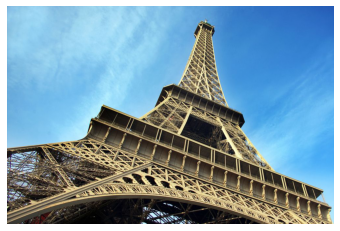

In [21]:
# loading image
print("Attempting to load image.")
try:
    img_path = "img.jpg"
    img = np.array(imread(img_path)/255.0)
    print("Image read succesfully. Displaying image:")
except Exception as e:
    print(e)
plotnoise(img, None, 0)
plt.show()

Adding Gaussian noise.


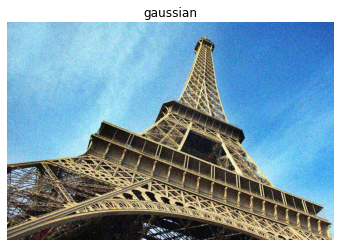

In [22]:
print("Adding Gaussian noise.")
plotnoise(img, "gaussian", 1)
plt.show()


Adding various degrees of Salt & Pepper noise.



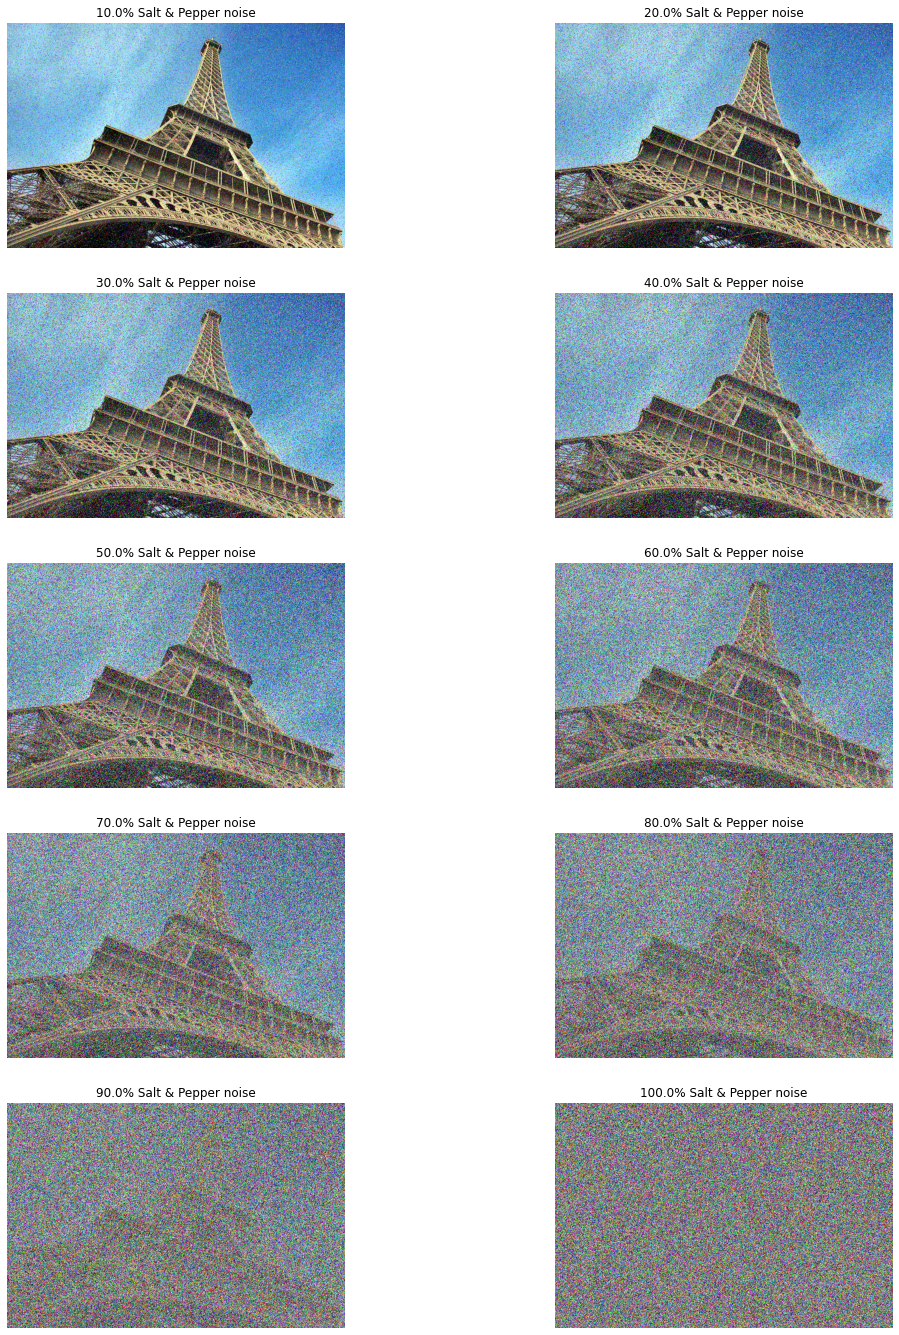

In [23]:
print("\nAdding various degrees of Salt & Pepper noise.\n")
plt.figure(2,figsize=(18,24))
images = noise(img, 2)

In [24]:
# getting probability distribution for all images. 
final_images = []
for i in images:
    final_images.append(probability_distribution(i))

In [25]:
base_entropy = entropy(final_images[0])
print(f"Entropy of original image = {base_entropy}")

Entropy of original image = 13.266217797366238


In [34]:
# calculating divergence compared to base image
entropy_list = []
divergence_list = []
for i in range(1, len(final_images)):
    divergence_list.append((i/10, entropy(final_images[i], final_images[0], base=2)))
    entropy_list.append((i/10, entropy(final_images[i], base=2)))

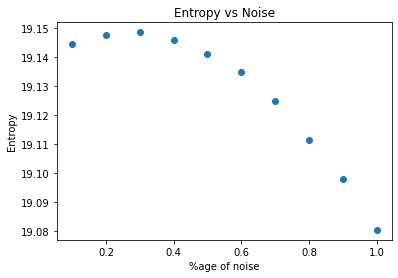

In [31]:
# plotting entropy
plt.figure(4)
x, y = [i[0] for i in entropy_list], [i[1] for i in entropy_list]
plt.scatter(x,y)
plt.title("Entropy vs Noise")
plt.ylabel("Entropy")
plt.xlabel("%age of noise")
plt.show()

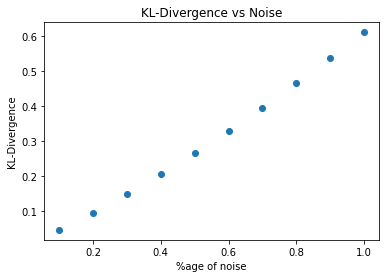

In [33]:
# plotting KL-Divergence
plt.figure(5)
x, y = [i[0] for i in divergence_list], [i[1] for i in divergence_list]
plt.scatter(x,y)
plt.title("KL-Divergence vs Noise")
plt.ylabel("KL-Divergence")
plt.xlabel("%age of noise")
plt.show()